<a href="https://colab.research.google.com/github/surajjeoor/Human_vs_machine_68/blob/main/Code_by_using_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this code is designed by following the tutorial on hugging face website, for more details visit : https://huggingface.co/
!pip install transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.5 MB/s eta 0:00:00


In [ ]:
#Installation of datasets
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.1 MB/s eta 0:00:00


In [ ]:
#Installation performed just to use TPU
!pip install cloud-tpu-client==0.10 torch==2.0 https://storage.googleapis.com/tpu-pytorch/wheels/colab/torch_xla-2.0-cp310-cp310-linux_x86_64.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/162.9 MB 1.1 MB/s eta 0:02:23
ERROR: Operation cancelled by user


In [ ]:
#Installation of necessary function related to tokenization and Datasets
from transformers import AutoTokenizer,DataCollatorWithPadding
from datasets import load_dataset,Dataset
import pandas as pd

#Importing dataset using pandas dataset
train_df=pd.read_excel("/content/English_Generated_GPT4_Data_Train.xlsx")
val_df=pd.read_excel("/content/English_Data_GPT4_Validation.xlsx")

In [ ]:
#importing the sys library
import sys

In [ ]:
#sys library imported to check the version of python used in google colab
print(sys.version)

3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]


In [ ]:
#confirmation of successful training dataset import
train_df.head()

,id,title,text,Generated By,labels
0,1,Cauvery Wildlife Sanctuary,The Cauvery Wildlife Sanctuary is a protected ...,Machine(GPT-4),0
1,2,Lachhu Maharaj (musician),Laxmi Narayan Singh (16 October 1944 - 5 Octob...,Machine(GPT-4),0
2,3,Maryland Route 318,Maryland Route 318 (MD 318) is a state highway...,Machine(GPT-4),0
3,4,Suzanne Duchamp,Suzanne Duchamp-Crotti (20 October 1889 – 11 S...,Human,1
4,5,Hurricane Patricia,Hurricane Patricia was the strongest tropical ...,Human,1


In [ ]:
#confirmation of successful validation dataset import
val_df.head()

,id,title,text,Generated By,labels
0,1,Kool (surname),Kool is a Dutch patronymic surname. Kool is de...,Machine(GPT-4),0
1,2,Vaguely Noble,Vaguely Noble (1965–1989) was an Irish-bred Th...,Machine(GPT-4),0
2,3,Complex event processing,Event processing is a method of tracking and m...,Machine(GPT-4),0
3,4,Phayao Kingdom,The Phayao Kingdom was a period in Thailand's ...,Machine(GPT-4),0
4,5,Dracula (Castlevania),"or simply known as , real name Count Dracula i...",Machine(GPT-4),0


In [ ]:
#removal of null records from validation data
val_df=val_df.dropna()

In [ ]:
#Removal of null records from train data
train_df=train_df.dropna()

In [ ]:
#Removal of column named "prompts" from training data
train_df=train_df.drop('Prompts',axis=1)

In [ ]:
#Removal of column named "prompts" from training data
val_df=val_df.drop('prompts',axis=1)

KeyError: ignored

In [ ]:
#command to check the table after the column removal
val_df.head()

,id,title,text,Generated By,labels
0,1,Kool (surname),Kool is a Dutch patronymic surname. Kool is de...,Machine(GPT-4),0
1,2,Vaguely Noble,Vaguely Noble (1965–1989) was an Irish-bred Th...,Machine(GPT-4),0
2,3,Complex event processing,Event processing is a method of tracking and m...,Machine(GPT-4),0
3,4,Phayao Kingdom,The Phayao Kingdom was a period in Thailand's ...,Machine(GPT-4),0
4,5,Dracula (Castlevania),"or simply known as , real name Count Dracula i...",Machine(GPT-4),0


In [ ]:
#command to check the table after the column removal
train_df.head()

,id,title,text,Generated By,labels
0,1,Cauvery Wildlife Sanctuary,The Cauvery Wildlife Sanctuary is a protected ...,Machine(GPT-4),0
1,2,Lachhu Maharaj (musician),Laxmi Narayan Singh (16 October 1944 - 5 Octob...,Machine(GPT-4),0
2,3,Maryland Route 318,Maryland Route 318 (MD 318) is a state highway...,Machine(GPT-4),0
3,4,Suzanne Duchamp,Suzanne Duchamp-Crotti (20 October 1889 – 11 S...,Human,1
4,5,Hurricane Patricia,Hurricane Patricia was the strongest tropical ...,Human,1


In [ ]:
#Converting Pandas dataset into hugging face datasets
from datasets import Dataset
train_dataset=Dataset.from_pandas(train_df)
val_dataset=Dataset.from_pandas(val_df)

In [ ]:
val_dataset

Dataset({
    features: ['id', 'title', 'text', 'Generated By', 'labels'],
    num_rows: 1600
})

In [ ]:
train_dataset

Dataset({
    features: ['id', 'title', 'text', 'Generated By', 'labels'],
    num_rows: 2000
})

In [ ]:
#preprocessing data for languages from train
checkpoint="distilbert-base-multilingual-cased"
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

def tokenization(example):
  return tokenizer(example["text"],truncation=True)

tokenized_dataset_train=train_dataset.map(tokenization,batched=True)
tokenized_dataset_train=tokenized_dataset_train.remove_columns(["title","text","id","Generated By"])
tokenized_dataset_train.set_format("torch")

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
tokenized_dataset_train=tokenized_dataset_train.rename_column("label","labels")

ValueError: ignored

In [ ]:
#preprocessing data for languages from validation
tokenized_dataset_val=val_dataset.map(tokenization,batched=True)
tokenized_dataset_val=tokenized_dataset_val.remove_columns(["title","text","id","Generated By"])
# tokenized_dataset_val=tokenized_dataset_val.rename_column("Label","labels")
tokenized_dataset_val.set_format("torch")

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [ ]:
#checking columns of train dataset after the pre-processing
tokenized_dataset_train

Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 2000
})

In [ ]:
#checking columns of validation dataset after the pre-processing
tokenized_dataset_val

Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 1600
})

In [ ]:
# tokenized_dataset_val=tokenized_dataset_val.remove_columns(["__index_level_0__"])

In [ ]:
#implementing data collator function to create the additional padding for equal number of sequences
data_collator=DataCollatorWithPadding(tokenizer)

In [ ]:
#check the column of tokenized datasets
print(tokenized_dataset_train)
print(tokenized_dataset_val)

Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 2000
})
Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 1600
})


In [ ]:
#importing the dataloader from pytorch
from torch.utils.data import DataLoader

train_dl=DataLoader(dataset=tokenized_dataset_train,batch_size=8,shuffle=True,collate_fn=data_collator)
val_dl=DataLoader(dataset=tokenized_dataset_val,batch_size=8,collate_fn=data_collator)

In [ ]:
#checking whether each batch has equal number of tokens
for batch in train_dl:
  break
print({k:v.shape for k,v in batch.items()})

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'labels': torch.Size([8]), 'input_ids': torch.Size([8, 308]), 'attention_mask': torch.Size([8, 308])}


In [ ]:
#Implementing model for the classification of sequence
from transformers import AutoModelForSequenceClassification

model=AutoModelForSequenceClassification.from_pretrained(checkpoint,num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#checking the working on the model
outputs=model(**batch)

In [ ]:
#checks losses and logits
print(outputs.loss,outputs.logits)

tensor(0.7258, grad_fn=<NllLossBackward0>) tensor([[ 0.0904, -0.0038],
        [ 0.1238,  0.0041],
        [ 0.1093, -0.0020],
        [ 0.1615,  0.0014],
        [ 0.0629,  0.0323],
        [ 0.0776,  0.0085],
        [ 0.0513,  0.0071],
        [ 0.1374,  0.0089]], grad_fn=<AddmmBackward0>)


In [ ]:
!pip install torch

In [ ]:
#Importing AdamW optimizer and pytorch library
from transformers import AdamW
import torch
# import torch_xla
# import torch_xla.core.xla_model as xm

In [ ]:
#implementing optimizer with learning rate 5 x 10^-5
optim=AdamW(params=model.parameters(),lr=5e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
#a learning scheduler will update the optimizers learning rate at each step
from transformers import get_scheduler
num_epochs=2
num_training_step=num_epochs*(len(train_dl))
lr_scheduler=get_scheduler("linear",optimizer=optim,num_warmup_steps=0,num_training_steps=num_training_step)

In [ ]:
#xm is the function that is imported from core_xla model is commented in the previous cell which was basically plays the role in running the model on TPU
device1=xm.xla_device()

NameError: ignored

In [ ]:
#real model training starts
device=torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
print(device)

cuda


In [ ]:
#creating list for recording the loss
loss_list=[]
count_list=[]
count=0

In [ ]:
#code for training
from tqdm.auto import tqdm
# accel=Accelerator()
# model,optimizer,train_dataloader=accel.prepare(model,optim,train_dl)
pro_bar=tqdm(range(num_training_step))
model.train()
for epo in range(num_epochs):
  for batch in train_dl:
    batch={k:v.to(device) for k,v in batch.items()}
    output_1=model(**batch)
    loss=output_1.loss
    loss1=loss.cpu()
    loss_list.append(float(loss1))
    count=count+1
    count_list.append(count)
    # accel.backward(loss)
    loss.backward()

    optim.step()
    lr_scheduler.step()
    optim.zero_grad()
    pro_bar.update(1)

  0%|          | 0/500 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
loss_list
count_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102]

In [ ]:
#importing matplotlib to plot the graph
import matplotlib.pyplot as plt

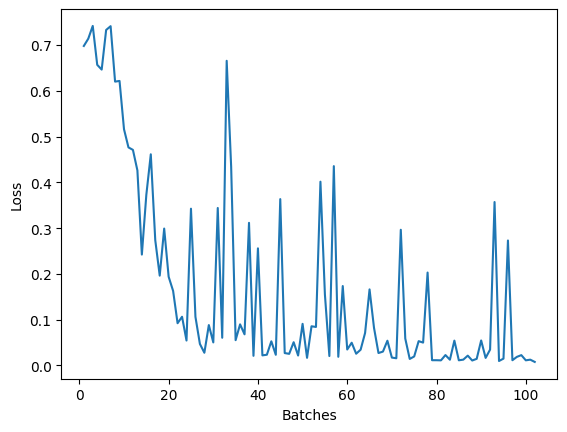

In [ ]:
#plotting the graph of training loss with respect to batches
plt.xlabel("Batches")
plt.ylabel("Loss")

plt.plot(count_list,loss_list)
plt.show()

In [ ]:
#installing evaluate function
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 2.1 MB/s eta 0:00:00


In [ ]:
#importing the library
import evaluate

In [ ]:
#combining all evaluation metrics
clf_metrics=evaluate.combine(["accuracy","f1","precision","recall"])

In [ ]:
#creating the lists for valitation loss
val_loss_set=[]
val_count_set=[]
val_count=0

In [ ]:
#testing the model and evaluating the model
from datasets import load_metric
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import numpy as np
# accuracy_metric=load_metric('accuracy')
# precision_metric=load_metric('precision')
# recall_metric=load_metric('recall')
# f1_metric=load_metric('f1')
# metric=load_metric("glue","mrpc")
cm=np.zeros((2,2),dtype=np.int)
model.eval()
for batch in val_dl:
  batch={k:v.to(device) for k,v in batch.items()}
  with torch.no_grad():
    outputs=model(**batch)

  logits=outputs.logits
  val_loss=outputs.loss
  val_loss_1=val_loss.cpu()
  val_loss_set.append(float(val_loss_1))
  val_count=val_count+1
  val_count_set.append(val_count)
  predictions=torch.argmax(logits,dim=-1)
  # print(predictions)
  # print(batch['labels'])
  # metric.add_batch(predictions=predictions,references=batch["labels"])
  clf_metrics.add_batch(predictions=predictions,references=batch["labels"])
  ref=batch["labels"]
  ref_np=ref.cpu().numpy()
  pred=predictions.cpu().numpy()
  cm+=confusion_matrix(ref_np,pred)
  # accuracy_metric.add_batch(predictions=predictions,references=batch["labels"])
  # precision=precision_metric.compute(predictions=predictions,references=batch["labels"])
  # recall=recall_metric.compute(predictions=predictions,references=batch["labels"])
  # f1_score=f1_metric.compute(predictions=predictions,references=batch["labels"])

# accuracy=accuracy_metric.compute()
# precision=precision_metric.compute()
# recall=recall_metric.compute()
# f1_score=f1_metric.compute()

display1=ConfusionMatrixDisplay(confusion_matrix=cm)
clf_metrics.compute()

<ipython-input-39-0c65fa5fcd07>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm=np.zeros((2,2),dtype=np.int)


{'accuracy': 0.38,
 'f1': 0.4745762711864407,
 'precision': 0.4117647058823529,
 'recall': 0.56}

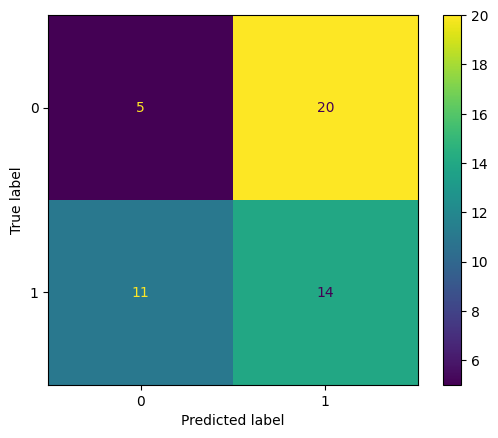

In [ ]:
#plotting the confusion matrix
display1.plot()

In [ ]:
val_loss_set

[1.270890712738037,
 0.980137288570404,
 0.8320566415786743,
 0.9468689560890198,
 0.915505588054657,
 0.8544434309005737,
 2.643866539001465]

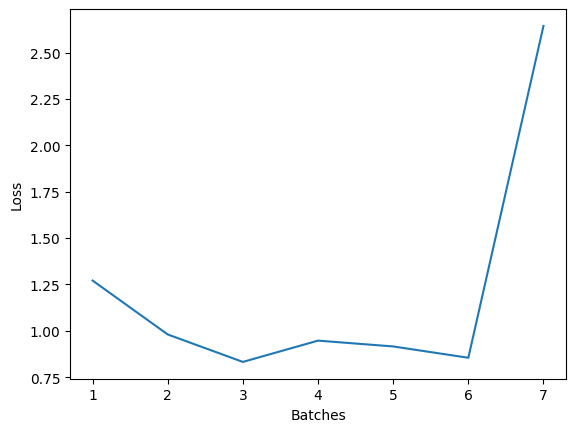

In [ ]:
#plotting the validation loss with respect to batch
plt.xlabel("Batches")
plt.ylabel("Loss")
plt.plot(val_count_set,val_loss_set)
plt.show()

In [ ]:
cm

In [ ]:
len(val_dataset)

In [ ]:
#installing SHAP library
!pip install --upgrade shap

In [ ]:
#importing pipeline function from the transformers library
from transformers import pipeline

In [ ]:
#Bringing the trained model from GPU to CPU
model_cpu=model.cpu()

In [ ]:
#creating the model pipeline to classify the random texts
pipe=pipeline(task="text-classification",model=model_cpu,tokenizer=tokenizer)

In [ ]:
#creating function for score and visualize
def score_and_visualize(textu,shap_values):
  prediction=pipe(textu)
  print(f"the predicted model is gonna be:{prediction}")
  shap.plots.text(shap_values)

In [ ]:
#initializing human text
text1_human=["""Nights Like These is an American metal band from Memphis, Tennessee, United States, heavily influenced by death metal and sludge metal. Biography
In 2006, Nights Like These released their debut, The Faithless, to overall positive reviews on Victory Records.  They released their most recent album Sunlight at Secondhand on October 16, 2007, again on Victory Records.

In 2008, the band went on hiatus for the first part of the year. It was later announced (via the band's Myspace) that drummer Patrick Leatherwood had left the band due to other commitments. The band announced that they were planning to scale back on touring and albums, as opposed to taking on a full-time touring schedule with yearly albums. The Victory Records website has taken off Nights Like These from their "Artist" page, this has since started a fire storm of rumors that the band and Victory have separated. On July 15, 2008, Nights Like These posted a Myspace blog confirming their split with Victory and their new drummer Todd Pasterniak. It was announced on October 5, 2009 on Myspace that members of Nights Like These were working on a new musical endeavor under the name Panther Piss.
A release party for their 7" was held on March 6. As of 2013 the band is back together, playing a variety of shows in their hometown of Memphis."""]

In [ ]:
#initialling machine generated text
text3_machine=["""Nights Like These is an American metalcore band from Orlando, Florida. Formed in 2006, the band has released two albums, "Nights Like These" (2007) and "The Great Distraction" (2009), and has toured with bands such as Killswitch Engage, As I Lay Dying, and Trivium.

Nights Like These was formed in 2006 by guitarists Tony Campos and Jordan Sinclair, bassist Dustin Riggs, and drummer Anthony Villa. The band released its debut album, "Nights Like These", in 2007 on Fearless Records. The album was produced by Joey Sturgis of Killswitch Engage and featured guest appearances from vocalists Justin Foley of Killswitch Engage, Chris Kontos of As I Lay Dying, and Tim Lambesis of Lamb of God. The album peaked at number 137 on the "Billboard" 200 chart. In 2009, Nights Like These released its second album, "The Great Distraction". The album was produced by Alex Skolnick of Testament and featured guest appearances from vocalists Phil Anselmo of Pantera and Corey Taylor of Slipknot. The album peaked at number 47 on the "Billboard" 200 chart. In 2011, Villa departed the band to focus on his personal life. He was replaced by former Unearth drummer Brian Buckley.

Since its formation, Nights Like These has toured with bands such as Killswitch Engage, As I Lay Dying, and Trivium. In November 2011, Nights Like"""]

In [ ]:
#initiallizing anothe human generated text
text_human=["""McLaren Racing Limited is a British motor racing team based at the McLaren Technology Centre in Woking, Surrey, England. McLaren is best known as a Formula One constructor, the second oldest active team and the second most successful Formula One team after Ferrari, having won 183 races, 12 Drivers' Championships and 8 Constructors' Championships. McLaren also has a history of competing in American open wheel racing, as both an entrant and a chassis constructor, and has won the Canadian-American Challenge Cup (Can-Am) sports car racing championship. The team is a subsidiary of the McLaren Group, which owns a majority of the team."""]

In [ ]:
#initiallizing the machine generated text
text2_machine=["""McLaren Racing Limited is a British Formula One team and a subsidiary of McLaren Group. Founded in 1963, it has a storied history of success, with multiple Constructors' and Drivers' Championships. The team has been associated with legendary drivers and known for technical innovations. Additionally, McLaren Group also produces high-performance sports cars under McLaren Automotive. As of September 2021, the team had been making progress in the midfield of Formula One, aiming for a return to the top ranks."""]

In [ ]:
#importing SHAP library
import shap

In [ ]:
#Initiallizing the SHAP Explainer
explainer=shap.Explainer(pipe)
shap_values=explainer(text_human)

In [ ]:
#implementing the function
score_and_visualize(text1_human,shap_values)

In [ ]:
#initiallizing another shap values
shap_values_2=explainer(text2_machine)

In [ ]:
#implementing the same function
score_and_visualize(text3_machine,shap_values_2)